# "Sklearn SVM: Classification with GridSearch" 

- title: "Sklearn SVM: Classification with GridSearch"
- toc: true
- badges: False
- comments: true
- author: Sam Treacy
- categories: [sklearn, svm, pandas, gridsearch, seaborn, matplotlib, classification, python]

In [130]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [131]:
from sklearn.model_selection import train_test_split

In [132]:
# Load Data
from sklearn.datasets import load_breast_cancer

cancer_data = load_breast_cancer()

cancer_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [133]:
print(cancer_data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [134]:
cancer_data['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [135]:
cancer = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
cancer.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [136]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [137]:
cancer.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


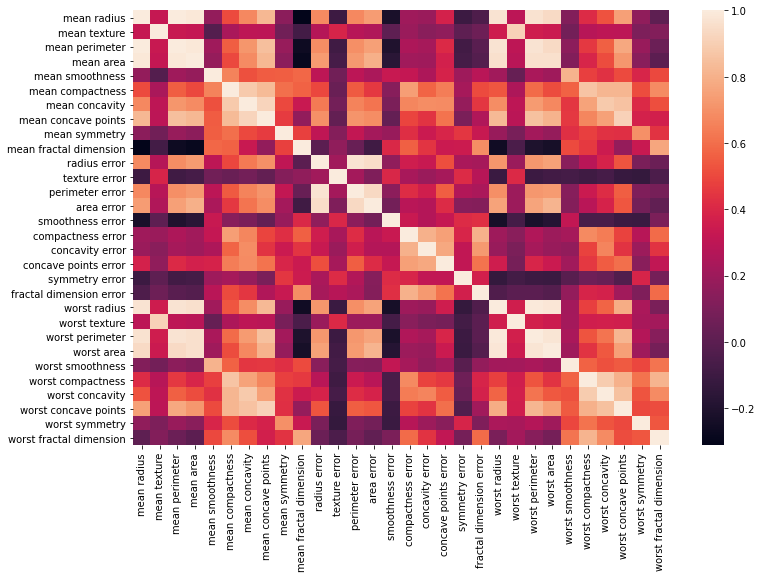

In [172]:
plt.figure(figsize=(12,8))
sns.heatmap(cancer.corr(method='pearson'));

In [138]:
cancer_data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [139]:
# Create target and feature data

X = cancer

y = cancer_data.target

# Split Data

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [141]:
X_train.shape, X_test.shape

((455, 30), (114, 30))

# Explore Data

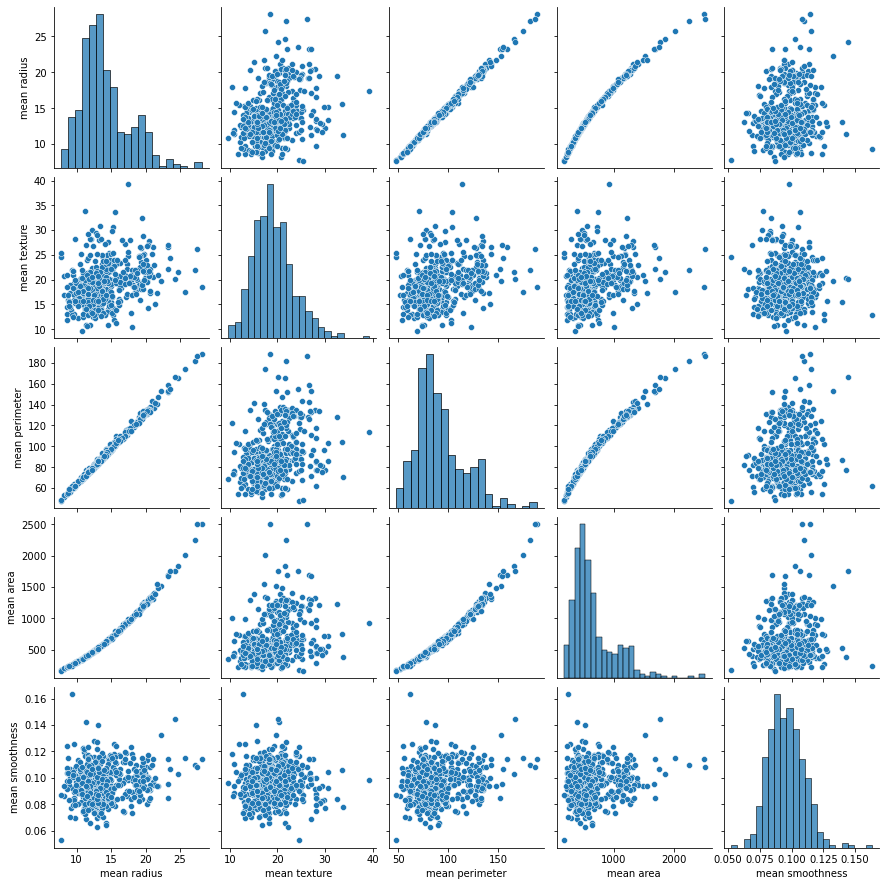

In [144]:
sns.pairplot(X_train.iloc[:,0:5]);

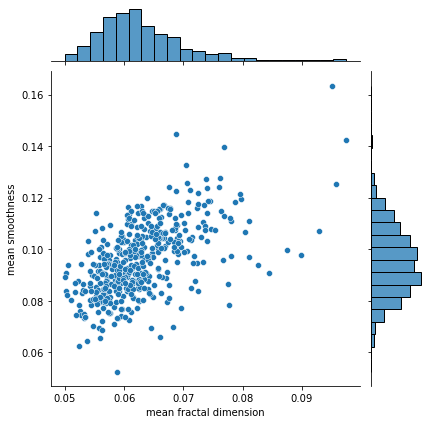

In [145]:
sns.jointplot(x='mean fractal dimension', y='mean smoothness', data=X_train);

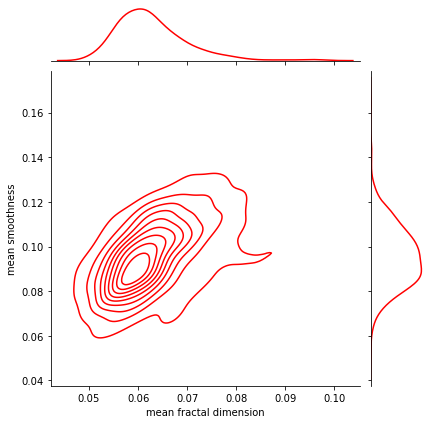

In [146]:
sns.jointplot(x='mean fractal dimension', y='mean smoothness', 
               data=X_train, kind='kde', color='red');

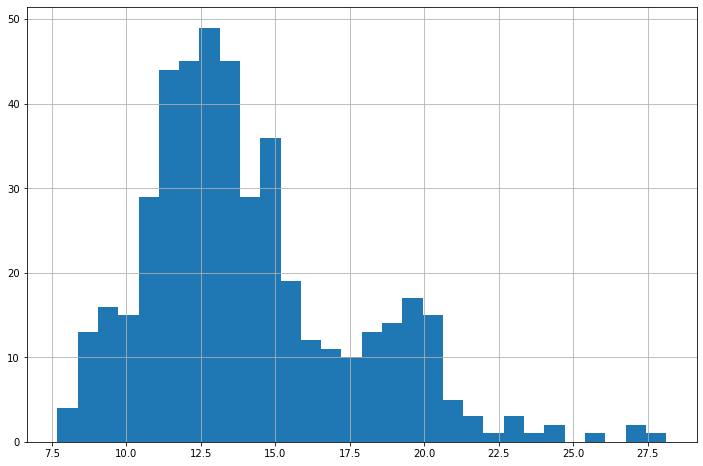

In [147]:
plt.figure(figsize=(12,8))
X_train['mean radius'].hist(bins=30);

# Scale Data

In [148]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()


X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

# Fit SVC Classifier

In [149]:
from sklearn.svm import SVC

model = SVC()

model.fit(X_train, y_train)

SVC()

# Predict & Evaluate

In [150]:
predictions = model.predict(X_test)

In [151]:
from sklearn.metrics import confusion_matrix, classification_report

In [152]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [153]:
confusion_matrix(y_test, predictions)

array([[41,  2],
       [ 1, 70]])

# Predict on new value

In [154]:
X_test.shape

(114, 30)

In [155]:
new_value = X_test[0].reshape(1,30)

In [156]:
model.predict(new_value)

array([1])

In [157]:
print(y_test[0])

1


# Grid Search 

In [158]:
from sklearn.model_selection import GridSearchCV

In [159]:
model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [160]:
# Search based on 'C', 'gamma' and 'kernel'

param_grid = {'C':[0.1, 1, 10, 100, 1000],
              'gamma':[1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['poly', 'rbf', 'sigmoid']}

In [161]:
grid = GridSearchCV( SVC(), param_grid, refit=True, verbose=0)

# You should add refit=True and choose verbose to whatever number 
# you want, higher the number, the more verbose.

In [162]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['poly', 'rbf', 'sigmoid']})

In [163]:
grid.best_score_

0.9780219780219781

In [164]:
grid.best_estimator_

SVC(C=0.1, gamma=1, kernel='poly')

In [165]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'poly'}

In [166]:
grid_predictions = grid.predict(X_test)

In [167]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [168]:
print(confusion_matrix(y_test, grid_predictions))

[[41  2]
 [ 0 71]]


# KFold Cross Validation

In [186]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score



kfold = KFold(n_splits = 10, random_state=42, shuffle=True)



results = cross_val_score(grid, X_train, y_train, cv=kfold)

msg = 'Accuracy: %.3f%% (%.3f%%)' % (results.mean()*100.0, results.std()*100.0)

print(msg)

Accuracy: 96.928% (2.445%)


In [187]:
grid.best_estimator_

SVC(C=0.1, gamma=1, kernel='poly')

In [188]:
X_test.shape

(114, 30)

In [189]:
grid.predict(X_test[0].reshape(1,30))

array([1])